<a href="https://colab.research.google.com/github/JohnOngeri/CNN-in-class-activity-breakout-3/blob/main/CNN_Inclass_Activity_Breakout3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clinton Tanaka Pikita - We could have gotten 100% if we worked quicker.

Gaius Irakiza - i think we needed more Training data to make our model more robust.

Nelly Iyabikoze-I think we could have clarified the task requirements earlier and be quick in order to get 100 pts.

John Ongeri Ouma. A brief comment on what each label represents would have improved clarity

Chol Daniel- We coud have be more perfect if there was enough time.

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image

In [11]:
import numpy as np
from PIL import Image
import os

def load_and_preprocess_images(image_paths, target_size=(28, 28)):
    if len(image_paths) < 4:
        raise ValueError("At least 4 images are required.")

    images = []
    for path in image_paths:
        if not os.path.exists(path):
            print(f"Warning: File not found - {path}")
            continue
        try:
            # Open and convert to grayscale
            img = Image.open(path).convert('L')
            # Resize
            img = img.resize(target_size)
            # Convert to array and normalize
            img_array = np.array(img).reshape(*target_size, 1) / 255.0
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {path}: {e}")
            continue

    if len(images) < 4:
        raise ValueError("Fewer than 3 valid images could be loaded.")

    return np.array(images)

# Use your confirmed paths
image_paths = [
    "/content/Lion images.webp",
    "/content/cat images.webp",
    "/content/cow images.jpg",
    "/content/dog images.jpg"
]

# Process images
processed_images = load_and_preprocess_images(image_paths)
print("Processed images shape:", processed_images.shape)


Processed images shape: (4, 28, 28, 1)


In [12]:
# Load and preprocess
X_train = load_and_preprocess_images(image_paths)

# labels
y_train = np.array([0, 1, 0, 1])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (4, 28, 28, 1)
y_train shape: (4,)


In [21]:
def train_model(optimizer, lr=0.01):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer=optimizer(learning_rate=lr),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    print(f"\nTraining with {optimizer.__name__} (lr={lr}):")
    history = model.fit(X_train, y_train, epochs=5, batch_size=4, verbose=1)
    return history

# Test different options
optimizers = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD, tf.keras.optimizers.RMSprop]
learning_rates = [0.001, 0.01, 0.1]

for opt in optimizers:
    for lr in learning_rates:
        train_model(opt, lr)


Training with Adam (lr=0.001):
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.5160
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7500 - loss: 0.5761
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 1.0000 - loss: 0.4012
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 1.0000 - loss: 0.2909
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 0.2286

Training with Adam (lr=0.01):
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.3593
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7500 - loss: 0.5009
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5000 - loss: 8.4440
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 2.1711
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 2.3171

Training with Adam (lr=0.1):
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step - accuracy: 0.0000e+00 - loss: 1.9259

In [18]:
# Add model summary here
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,996 (394.52 KB)

 Trainable params: 100,996 (394.52 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Verify we have exactly 4 samples
assert len(X_train) == 4, f"Expected 4 training samples, got {len(X_train)}"
assert len(y_train) == 4, f"Expected 4 labels, got {len(y_train)}"

# Train the model with adjusted batch size
model.fit(X_train, y_train,
          epochs=10,
          batch_size=4)  # Changed from 32 to 4 to match our 4 samples

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step - accuracy: 0.2500 - loss: 1.3750
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7500 - loss: 0.6566
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.4150
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.3207
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.2570
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.1930
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.1558
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.1273
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0982
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0739


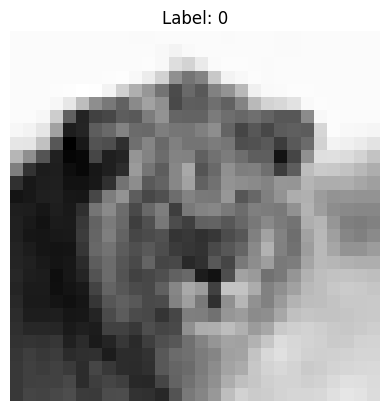

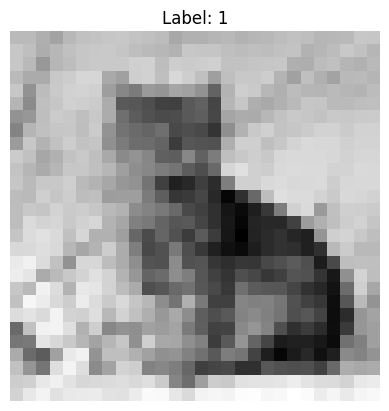

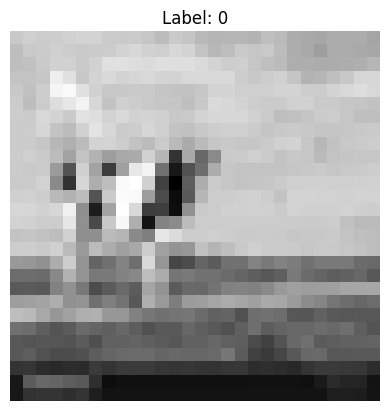

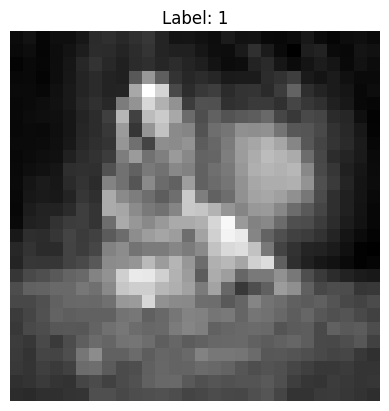

In [16]:
import matplotlib.pyplot as plt

for i in range(len(X_train)):
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()
